<a href="https://colab.research.google.com/github/ahliminha/F_604/blob/master/CrossEntropy_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
np.random.seed(816)

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


In [4]:
x_train = x_train/255
x_test = x_test/255

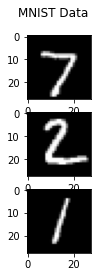

In [5]:
fig, axs = plt.subplots(3)
fig.suptitle('MNIST Data')
for i in range(3):

  img = x_test[i]
  label = y_test[i]

  axs[i].imshow(img, cmap="gray")

In [6]:
y_train = keras.utils.to_categorical(y = y_train)
y_test  = keras.utils.to_categorical(y = y_test)

In [7]:
input_layer = keras.Input(shape = (28,28,1))
x = keras.layers.Conv2D(32,3)(input_layer)
x = keras.layers.Conv2D(64,3)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(100)(x)
x = keras.layers.Dense(100)(x)
output = keras.layers.Dense(10, activation='softmax')(x)

In [8]:
model = keras.Model(inputs=input_layer, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               3686500   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010  

In [9]:
opt = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True)  # default params
model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [10]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000, 10)


In [11]:
history = model.fit(x = x_train, y = y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 2.1507 - accuracy: 0.8635
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3144 - accuracy: 0.9113
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3021 - accuracy: 0.9159
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2942 - accuracy: 0.9163
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2864 - accuracy: 0.9197
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2826 - accuracy: 0.9202
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2771 - accuracy: 0.9225
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2764 - accuracy: 0.9224
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2722 - accuracy: 0.9236
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2686 - accuracy: 0.9235

In [12]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2966 - accuracy: 0.9196


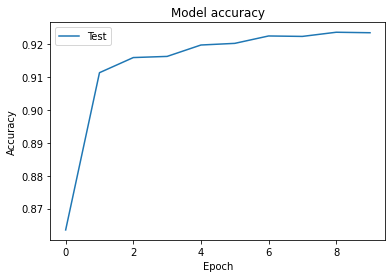

In [38]:
# Plot test accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper left')
plt.savefig('acc.png')
plt.show()

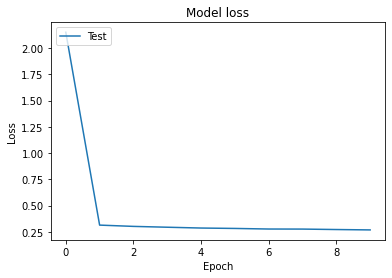

In [37]:
# Plot test loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper left')
plt.savefig('loss.png')
plt.show()

In [15]:
acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2966 - accuracy: 0.9196


In [25]:
test_predictions = model.predict(x_test)
np.argmax(test_predictions[:5], axis=1)

array([7, 2, 1, 0, 4])

In [26]:
from sklearn.metrics import confusion_matrix
import numpy as np

confusion = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_predictions,axis=1))

In [27]:
confusion

array([[ 950,    0,    3,    1,    2,    5,   13,    5,    1,    0],
       [   0, 1110,    6,    1,    0,    2,    4,    1,   11,    0],
       [   6,   10,  936,   12,   10,    2,   15,    8,   26,    7],
       [   4,    1,   31,  878,    3,   37,    4,   15,   28,    9],
       [   1,    3,    3,    2,  915,    0,   11,    3,   10,   34],
       [  12,    2,    9,   21,   12,  758,   27,   11,   36,    4],
       [   7,    3,    9,    2,   10,    7,  916,    2,    2,    0],
       [   1,   11,   27,    2,    5,    1,    0,  953,    3,   25],
       [   7,   12,    4,   12,    7,   29,   16,   11,  873,    3],
       [   9,    7,    2,    4,   27,    7,    1,   27,   18,  907]])

In [33]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('cm.png')
    return fig

In [34]:
import seaborn as sns

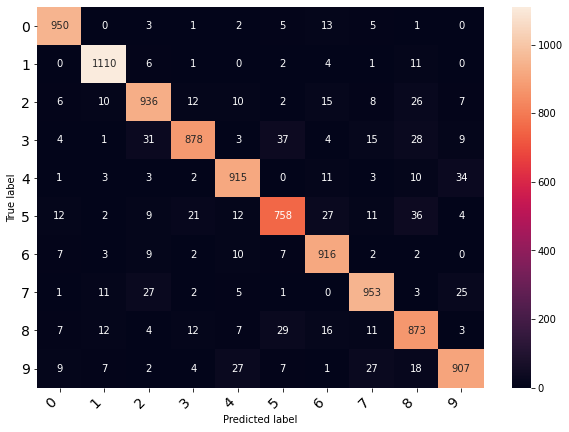

In [35]:
fig = print_confusion_matrix(confusion, np.arange(10))

<Figure size 432x288 with 0 Axes>